<a href="https://colab.research.google.com/github/camilodel02/Prueba_tecnica_crecereAI/blob/main/Notebook_main_CamiloDelgado_Crecer%C3%A9AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Librerías

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import roc_auc_score


#Lectura de dataset

In [3]:
rd = pd.read_csv('/content/drive/MyDrive/Dataset_PT_CreceráAI/prueba_analist_de_datos_crecere.csv')
print("=== Head del dataset ===")
print(rd.head())

print("\n=== Información del dataset ===")
rd.info()

=== Head del dataset ===
   antiguedad_deuda   deuda_total  mujer       edad  region_bogota  \
0               491  4.819506e+07      0  42.225370              0   
1               615  6.192111e+07      0  27.134840              0   
2               850  3.505055e+07      0  42.595440              0   
3              1243  8.598943e+07      0  27.001417              1   
4               416  1.144557e+07      0  39.581093              0   

   propuesta_cuotas  propuesta_descuento  estrategia_agresiva origen_deudor  \
0                 5             0.062792                    1      Colombia   
1                 6             0.326825                    0      Colombia   
2                 6             0.579158                    0      Colombia   
3                 9             0.484808                    0      Venzuela   
4                 9             0.259015                    0      Colombia   

  estado_civil  tiene_propiedades producto_origen_deuda  \
0  union libre      

#EDA

## Insights

### 1. Entendimiento general de la data

In [4]:
'''
Esta celda muestra la cantidad de datos que tiene cada valor distinto por columna (categorías)
de las variables que no son numéricas.
'''

non_num_cols = rd.select_dtypes(include=['object']).columns.tolist()
for col in non_num_cols:
    print(value_counts := rd[col].value_counts())
    print(nunique_values := rd[col].nunique())
    print("\n")


origen_deudor
Colombia    990
Venzuela      8
otros         2
Name: count, dtype: int64
3


estado_civil
soltero/a      361
union libre    327
casado/a       312
Name: count, dtype: int64
3


producto_origen_deuda
credito vehiculo    270
otro                249
tarjeta credito     242
libre inversion     239
Name: count, dtype: int64
4


helado_favorito
No le gusta el helado    207
ron con pasas            199
chocolate                199
fresa                    199
otro                     196
Name: count, dtype: int64
5




###2. Mapa de calor de correlaciones

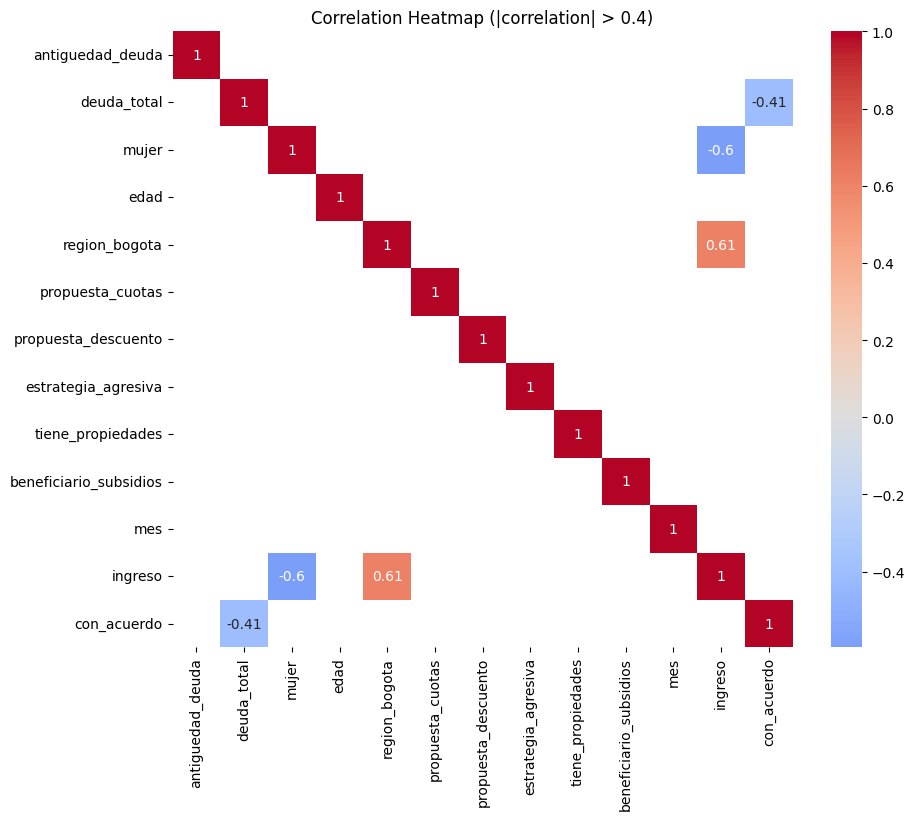

In [5]:
'''
Mapa de calor para identificar correlaciones entre variables numéricas.
'''

numerical_data = rd.select_dtypes(include=[np.number])
data_correlation = numerical_data.corr()

data_correlation_filtered = data_correlation.where(abs(data_correlation) >0.4)

plt.figure(figsize=(10, 8))
sns.heatmap(data_correlation_filtered, annot=True, cmap='coolwarm', center=0)
sns.set(font_scale=1.0, style="whitegrid")
plt.title('Correlation Heatmap (|correlation| > 0.4)')
plt.show()

###3. Distribuciones

In [6]:
# Distribución de aceptación según aceptación de acuerdo
rd['con_acuerdo'].value_counts(normalize=True)


,proportion
con_acuerdo,
0,0.912
1,0.088


El 91% de los deudores no logró un acuerdo

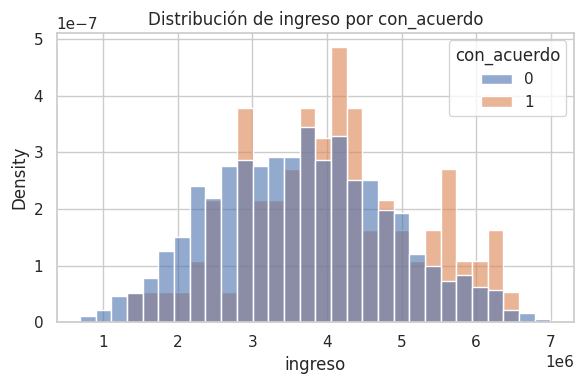

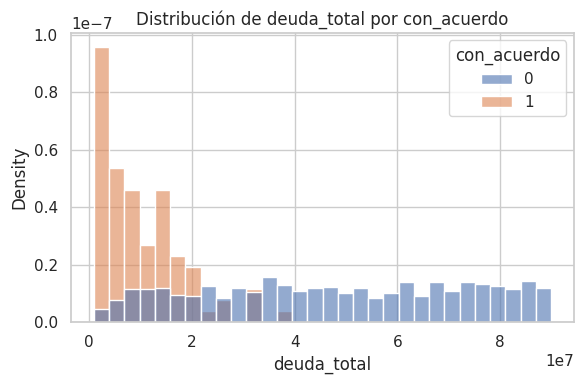

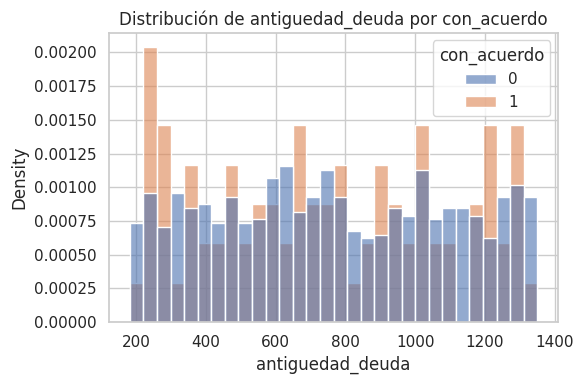

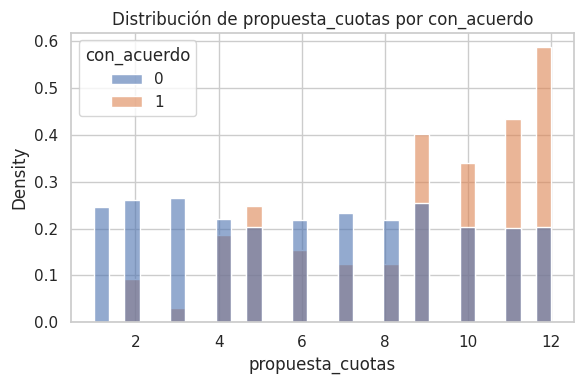

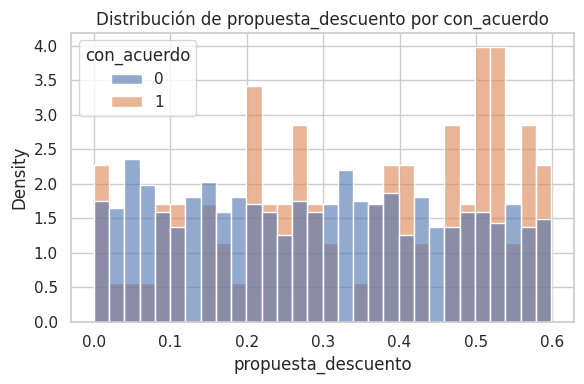

In [7]:
# Gráficos de distribución según variables
num_cols = [
    'ingreso',
    'deuda_total',
    'antiguedad_deuda',
    'propuesta_cuotas',
    'propuesta_descuento'
]

for col in num_cols:
    plt.figure(figsize=(6,4))

    sns.histplot(
        data=rd,
        x=col,
        hue='con_acuerdo',
        bins=30,
        stat='density',
        common_norm=False,
        alpha=0.6
    )

    plt.title(f'Distribución de {col} por con_acuerdo')
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3575357597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rd, x='con_acuerdo', y=col, palette='pastel')


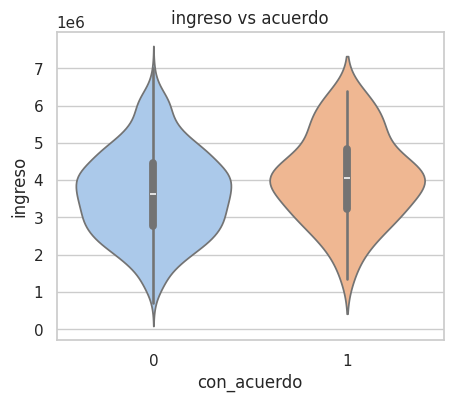

/tmp/ipython-input-3575357597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rd, x='con_acuerdo', y=col, palette='pastel')


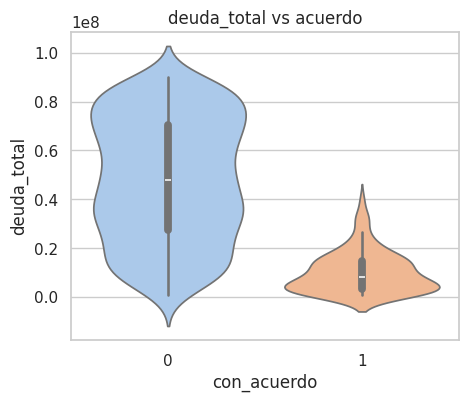

/tmp/ipython-input-3575357597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rd, x='con_acuerdo', y=col, palette='pastel')


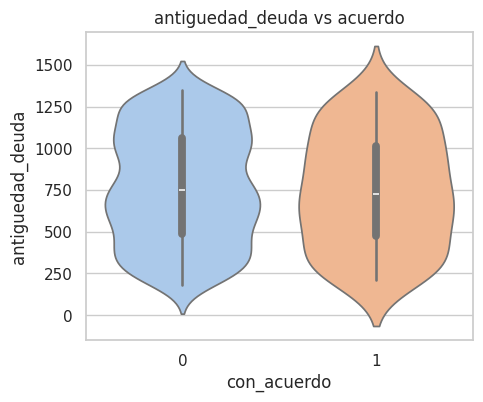

/tmp/ipython-input-3575357597.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=rd, x='con_acuerdo', y=col, palette='pastel')


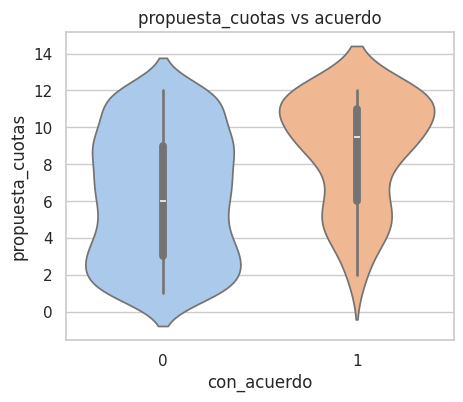

In [8]:
#Gráficos de violin para determinar la densidad y distribución de variables según aceptación de acuerdo
for col in ['ingreso', 'deuda_total', 'antiguedad_deuda', 'propuesta_cuotas']:
    plt.figure(figsize=(5,4))
    sns.violinplot(data=rd, x='con_acuerdo', y=col, palette='pastel')
    plt.title(f'{col} vs acuerdo')
    plt.show()


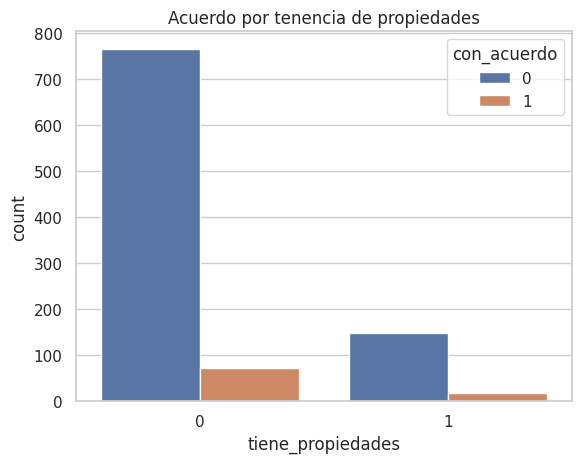

In [9]:
# Distribución de tenencia de propiedades según aceptación de acuerdo
sns.countplot(data=rd, x='tiene_propiedades', hue='con_acuerdo')
plt.title('Acuerdo por tenencia de propiedades')
plt.show()


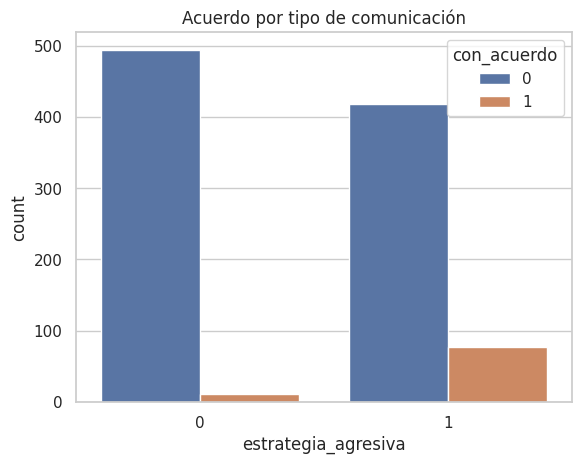

In [10]:
# Distribución de etsrategia agresiva según aceptación de acuerdo
sns.countplot(data=rd, x='estrategia_agresiva', hue='con_acuerdo')
plt.title('Acuerdo por tipo de comunicación')
plt.show()

#Modelamiento

## Regresión Logística explicativa

In [11]:
X = rd[['ingreso', 'deuda_total', 'antiguedad_deuda',
        'tiene_propiedades', 'estrategia_agresiva', 'propuesta_cuotas', 'beneficiario_subsidios']]
X = sm.add_constant(X)
y = rd['con_acuerdo']

x_res, y_res = SMOTETomek(random_state=42, sampling_strategy=0.5).fit_resample(X, y)
model = sm.Logit(y_res, x_res).fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.108321
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:            con_acuerdo   No. Observations:                 1292
Model:                          Logit   Df Residuals:                     1284
Method:                           MLE   Df Model:                            7
Date:                Thu, 22 Jan 2026   Pseudo R-squ.:                  0.8279
Time:                        21:17:42   Log-Likelihood:                -139.95
converged:                       True   LL-Null:                       -813.32
Covariance Type:            nonrobust   LLR p-value:                1.295e-286
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -6.2158      0.920     -6.757      0.000      -8.019     

## Regresión Logística predictiva

In [12]:
# Features y target
X = rd[['ingreso','deuda_total','antiguedad_deuda',
        'tiene_propiedades','estrategia_agresiva',
        'propuesta_cuotas','beneficiario_subsidios']]

y = rd['con_acuerdo'].astype(int)

#Se hace split para dividir el dataset en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#### Preparación de los datos

In [13]:
# Antes de entrenar el modelo se revisa la distribución de la variable objetivo para evitar sesgos por
# cantidad de información disponible
y_train.value_counts(normalize=True)

,proportion
con_acuerdo,
0,0.911429
1,0.088571


Como se evidencia, hay un sesgo muy alto ya que los datos explican el 91% de las veces que no se aceptó un acuerdo de pago, es decir que se debe balancear para reducir el sesgo y mejorar la precisión al momento de explicar la importancia y/o relación de las variables con la aceptación de acuerdo.

In [14]:
# Balanceo por medio de SMOTETomek
x_res, y_res = SMOTETomek(random_state=42, sampling_strategy=0.5).fit_resample(X_train, y_train)

In [15]:
y_res.value_counts(normalize=True)

,proportion
con_acuerdo,
0,0.678611
1,0.321389


In [16]:

# Logistic Regression
clf = LogisticRegression(max_iter=2000)
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(x_res)
X_test_sc = scaler.transform(X_test)
clf.fit(x_res, y_res)


# Probabilidades (para AUC)
proba_test = clf.predict_proba(X_test)[:, 1]
print("AUC:", roc_auc_score(y_test, proba_test))

AUC: 0.9675743964065132


#### Interpretación de variables

In [17]:
perm = permutation_importance(
    clf, X_test, y_test,
    n_repeats=30,
    random_state=42,
    scoring='roc_auc'
)

imp = pd.Series(perm.importances_mean, index=X.columns).sort_values(ascending=False)
print(imp)

deuda_total               0.440066
propuesta_cuotas          0.031672
ingreso                   0.010153
estrategia_agresiva       0.000627
tiene_propiedades         0.000075
beneficiario_subsidios    0.000066
antiguedad_deuda         -0.001764
dtype: float64


In [18]:
est = proba_test

##### Permutation importance

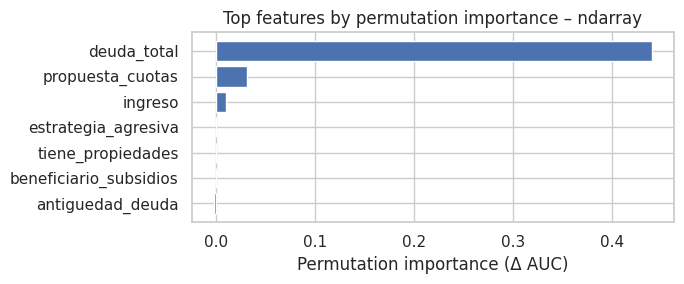

In [19]:
top_k = 7
means = perm.importances_mean
order = np.argsort(-means)[:top_k]
names = np.array(getattr(X, "columns", np.arange(X.shape[1])))[order]
vals = means[order]
plt.figure(figsize=(7, max(3, top_k * 0.4)))
plt.barh(range(len(vals)), vals)
plt.gca().invert_yaxis()
plt.yticks(range(len(vals)), names)
plt.xlabel("Permutation importance (Δ AUC)")
plt.title(f"Top features by permutation importance – {est.__class__.__name__}")
plt.tight_layout()
plt.show()

##### SHAP Values

/usr/local/lib/python3.12/dist-packages/shap/explainers/_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)


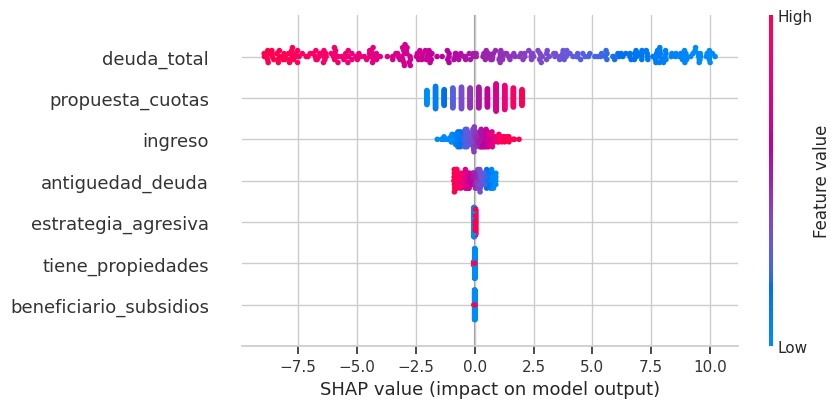

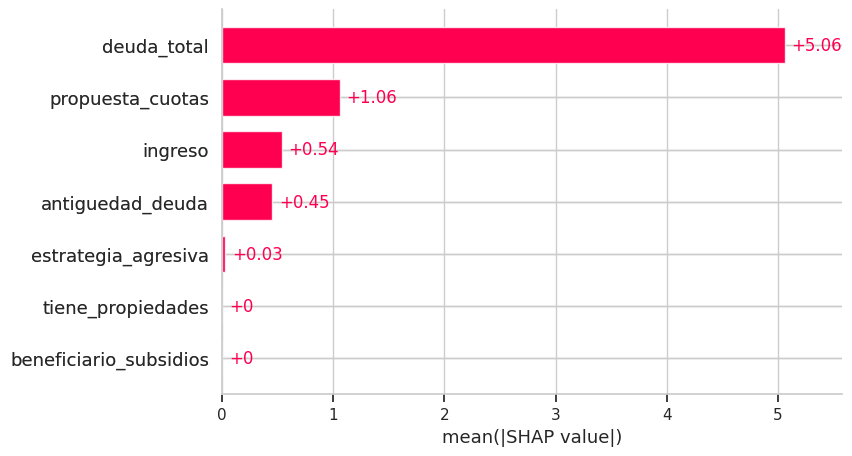

In [20]:
# SHAP
explainer = shap.LinearExplainer(clf, X_train, feature_perturbation="interventional")
shap_values = explainer(X_test)

# Resumen global
shap.plots.beeswarm(shap_values)
print('\n')
# Importancia global (magnitud promedio)
shap.plots.bar(shap_values)